In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [3]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [4]:
df['Дата'] = pd.to_datetime(df['Дата'])

Сгруппируйте данные по дате, посчитайте количество продаж

In [5]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

Вывести несколько первых строк сгруппированных данных

In [6]:
print(grouped_df.head())

        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Нарисуйте график продаж у `grouped_df`

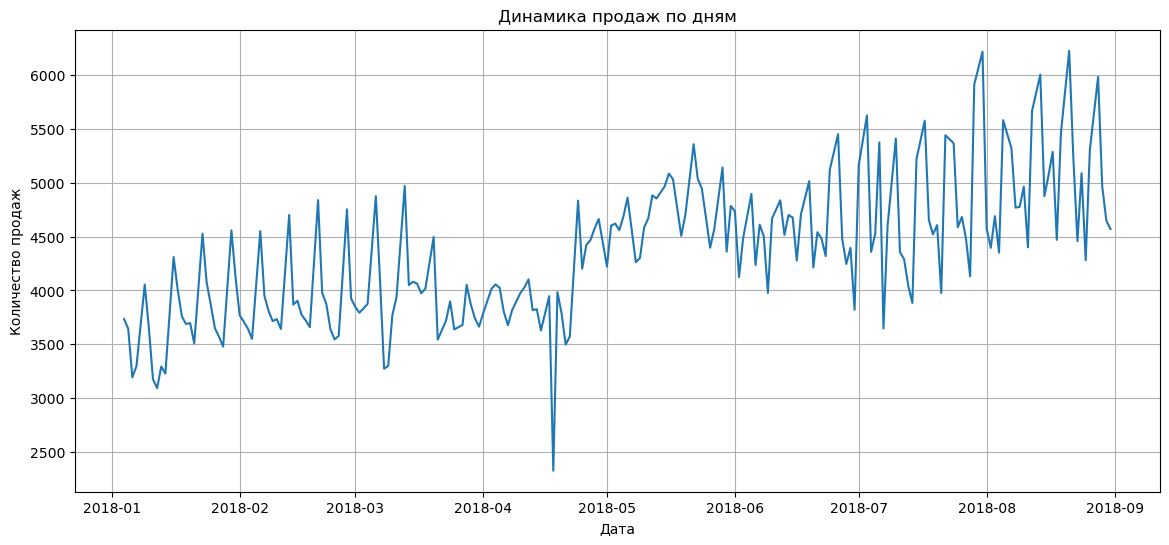

In [7]:
plt.figure(figsize=(14, 6))
plt.plot(grouped_df['Дата'],
grouped_df['Количество'])
plt.title('Динамика продаж по дням')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

##### Продажи не являются стабильными. На графике виден постепенный рост активности с января к середине лета. Это говорит о сезонном характере бизнеса - летом спрос выше, чем зимой. Основная масса продаж сосредоточена в будние дни. Так же на графике отчетливо видны несколько аномальных выбросов, что требует отдельного анализа конкретных сделок в эти дни.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [8]:
max_outlier = df.loc[df['Количество'].idxmax()]
print(f"Строка с максимальным выбросом:\n{max_outlier}")

Строка с максимальным выбросом:
Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [9]:
summer_wednesdays = df[(df['Склад'] == 3) & (df['Дата'].dt.month.isin([6, 7, 8])) & (df['Дата'].dt.dayofweek == 2)]

In [10]:
top_product = summer_wednesdays.groupby('Номенклатура')['Количество'].sum().idxmax()
print(f"Топовый товар по продажам по средам за июнь, июль, август у 3 склада: {top_product}")

Топовый товар по продажам по средам за июнь, июль, август у 3 склада: product_1


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

##### Для анализа выбрала период с января по август 2018 года. 

In [11]:
weather_df = pd.read_csv('weatherAstana.csv', sep = ';', skiprows=6, index_col = False)

In [12]:
weather_df.columns = weather_df.columns.str.replace('"', '').str.strip()

In [13]:
weather_df['Дата'] = pd.to_datetime(weather_df['Местное время в Астане'], dayfirst=True).dt.date
daily_temp = weather_df.groupby('Дата')['T'].mean().reset_index()

In [14]:
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата']).dt.date

In [15]:
merged_df = pd.merge(grouped_df, daily_temp, on = 'Дата', how='inner')

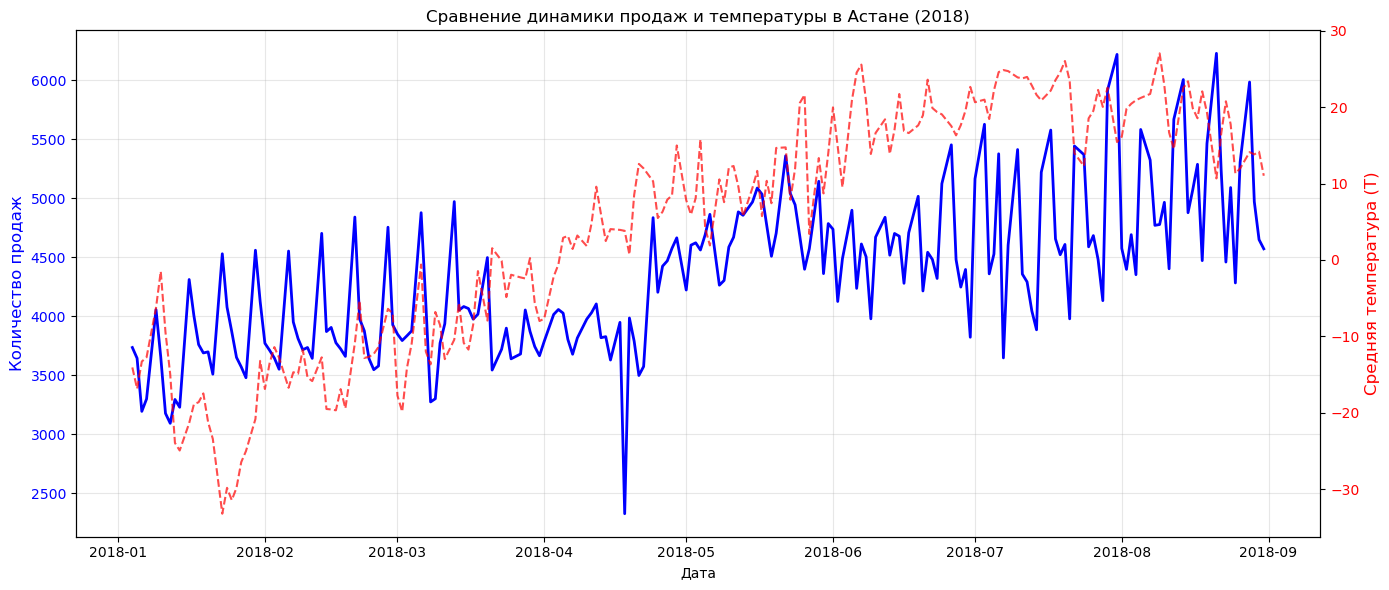

In [16]:
if merged_df.empty:
    print("Данные не пересикаются.")
else:
    fig, ax1 = plt.subplots(figsize=(14, 6))
    ax1.set_xlabel('Дата')
    ax1.set_ylabel('Количество продаж', color='blue', fontsize=12)
    ax1.plot(merged_df['Дата'], merged_df['Количество'], color = 'blue', linewidth=2, label='Продажи')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(True, alpha=0.3)
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('Средняя температура (T)', color='red', fontsize=12)
    ax2.plot(merged_df['Дата'], merged_df['T'], color = 'red', linestyle='--', alpha=0.7, label='Температура')
    ax2.tick_params(axis='y', labelcolor='red')
    plt.title('Сравнение динамики продаж и температуры в Астане (2018)')
    fig.tight_layout()
    plt.show()

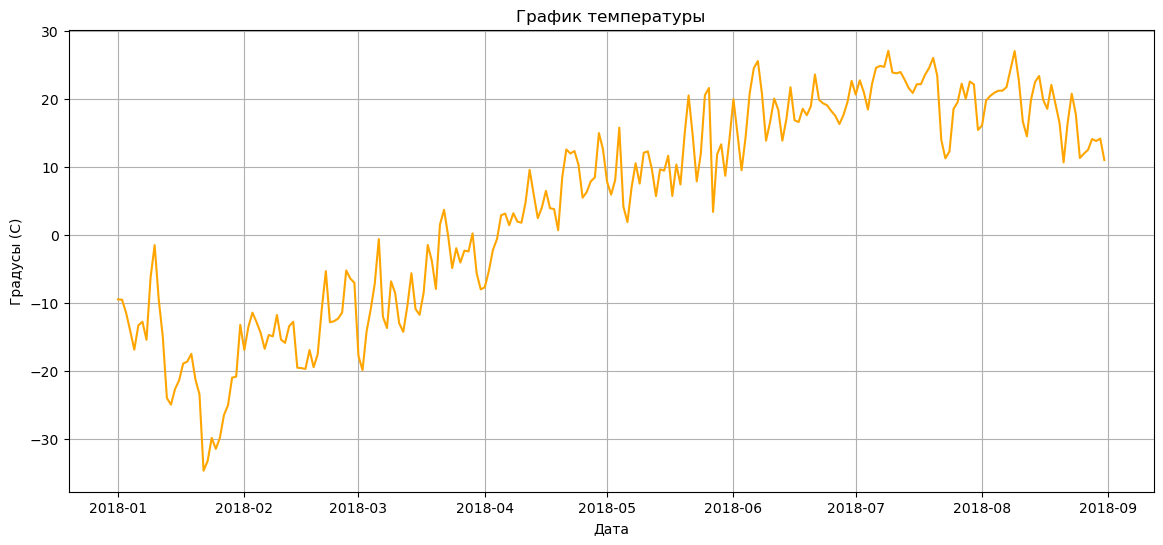

In [17]:
plt.figure(figsize=(14, 6))
plt.plot(daily_temp['Дата'], daily_temp['T'], color='orange')
plt.title("График температуры")
plt.xlabel('Дата')
plt.ylabel('Градусы (С)')
plt.grid(True)
plt.show()

##### Вывод: товар - сезонный. Он очень сильно зависит от погоды в Астане. Чем жарче на улице, тем лучше идут дела. А резкие скачки на графике говорят о том, что иногда бывают крупные оптовые заказы, которые не зависят от погоды, а просто происходят разово.